In [4]:
%matplotlib inline 
import numpy as np #work with arrays
from scipy import integrate 
from matplotlib.pylab import *

# Rayleigh Equation
Using Bernoulli Equation we have derived the dynamics of an empty spherical empty cavity in a large liquid pool, the so-called Rayleigh Equation:
$$\frac{3}{2} \dot{R}^2 + R \ddot{R}=-\frac{1}{\rho}p_0$$
We can solve this nonlinear ODE with the built in solver in python. Therefore, we have to rephrase the 2nd Order ODE into two first order ODEs by variable substitution:
$$y_0=R$$ $$y_1=\dot{R}$$
thus 
$$\dot{R}=\frac{dy_0}{dt}=y_1$$
and using the Rayleigh Equation we obtain:
$$\ddot{R}=\frac{dy_1}{dt}=-\frac{1}{y_0}\left(\frac{p_0}{\rho}+\frac{3}{2}y_1^2\right)$$
These two first order ODEs are defined as functin `rp(t,y)`

In [20]:
def rp(t,y):
    #n=len(y)
    #dydt=np.zeros((n,1))
    dydt[0]= y[1]
    dydt[1]= (-p0/rho-3./2.*y[1]*y[1])/y[0]
    return dydt[0]

Next we define the constants (density $\rho$, the pressure far from the bubble $p_0$, and the maximum bubble radius $R_\mbox{max}$) and the integration parameters.

In [26]:
p0=1e5            # atmospheric pressure
rho=1e3           # density of the liquid
Rmax=1e-3         # maximum radius
t_start = 0.0     # start of integration
t_final = 0.914*Rmax*sqrt(rho/p0) #estimated from the Rayleigh collapse time
delta_t = (t_final-t_start)/100.
num_steps = np.floor((t_final - t_start)/delta_t) + 1

The collapse time, $T_c$ which is the time from maximum bubble radius to $0$ can be calculated [analytically](http://arxiv.org/abs/physics/0702147)
 and is $$T_c\approx0.91 R_\mbox{max}\sqrt{\frac{\rho}{p_0}}\quad .$$ We use this here as the final time.

Next we set-up the integrator, provide the intital values (* which are? *), and calculate.

In [27]:
t = np.zeros((num_steps, 1))
R = np.zeros((num_steps, 1))
ode = integrate.ode(rp).set_integrator('vode', method='bdf')
ode.set_initial_value([Rmax,0],t_start)
R[0]=Rmax
t[0]=t_start
k=1
while ode.successful() and k<num_steps:
    ode.integrate(ode.t+delta_t)
    t[k]=ode.t
    R[k]=ode.y[0]
    k+=1

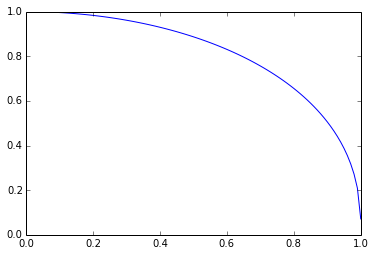

In [28]:
plot(t/t_final,R/Rmax)

In [21]:
from IPython.core.display import HTML
def css_styling():
    styles = open("styles/custom.css", "r").read()
    return HTML(styles)
css_styling()

In [25]:
sqrt(3.*math.pi/2.)*math.gamma(5./6.)/math.gamma(1./3.)

0.91468135650196214